In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#uci 
#This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades,
#demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are 
#provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008],
#the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a
#strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 
#correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful 
df1 = pd.read_csv('student_por.csv', delimiter=';')

#kaggle
#The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict
#students' end-of-term performances using ML techniques.
df2 = pd.read_csv('student_prediction.csv')

In [247]:
# Data Cleaning
# Check for missing values
print(df1.isnull().values.any())
print(df2.isnull().values.any())

False
False


In [248]:
# Checking for duplicates in each dataset
duplicates1 = df1.duplicated().sum()
print(f'Number of duplicate rows in dataset1: {duplicates1}')

duplicates2 = df2.duplicated().sum()
print(f'Number of duplicate rows in dataset2: {duplicates2}')

Number of duplicate rows in dataset1: 0
Number of duplicate rows in dataset2: 0


In [249]:
# Check data types
print(df1.dtypes)
print(df2.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
STUDENTID        object
AGE               int64
GENDER            int64
HS_TYPE           int64
SCHOLARSHIP       int64
WORK              int64
ACTIVITY          int64
PARTNER           int64
SALARY            int64
TRANSPORT         int64
LIVING            int64
MOTHER_EDU        int64
FATHE

In [250]:
# Display Dataset 1
display(df1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [251]:
# Display Dataset # 2
display(df2)

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [252]:
# Data Preprocessing

# Column Renaming

# Rename columns in df2 for consistency (including 'GRADE' to 'final_grade')
df2.rename(columns={
    'GENDER': 'sex',
    'AGE': 'age',
    'MOTHER_EDU': 'Medu',
    'FATHER_EDU': 'Fedu',
    'MOTHER_JOB': 'Mjob',
    'FATHER_JOB': 'Fjob',
    'STUDY_HRS': 'studytime',
    'ACTIVITY': 'activities',
    'PARTNER': 'romantic',
    'ATTEND': 'attendance',
    'KIDS': 'Pstatus',
    'CUML_GPA': 'gpa',
    'GRADE': 'final_grade'  # Rename 'GRADE' here
}, inplace=True)



In [253]:
# Categorical Encoding and Categorization

# Encode 'sex' column in df1 (1: Female, 2: Male) - Categorical Encoding
sex_mapping = {'F': 1, 'M': 2}
df1['sex'] = df1['sex'].replace(sex_mapping)

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_26191/1159468391.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['sex'] = df1['sex'].replace(sex_mapping)


In [254]:
# Binning of 'age' column in df1 into groups (0: ages 15-17, 1: ages 18-21, 2: age 22) - Categorization
age_mapping = {15: 0, 16: 0, 17: 0, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}
df1['age'] = df1['age'].replace(age_mapping)

In [255]:
# Encode 'Pstatus' column in df1 (1: married, 2: divorced) - Categorical Encoding
cohab_mapping = {'T': 1, 'A': 2}  # T: married, A: divorced
df1['Pstatus'] = df1['Pstatus'].replace(cohab_mapping)

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_26191/3264519391.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Pstatus'] = df1['Pstatus'].replace(cohab_mapping)


In [256]:
# Encode 'activities' and 'romantic' columns in df1 (1: yes, 2: no) - Categorical Encoding
activity_mapping = {'yes': 1, 'no': 2}
df1['activities'] = df1['activities'].replace(activity_mapping)
df1['romantic'] = df1['romantic'].replace(activity_mapping)


/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_26191/2090562399.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['activities'] = df1['activities'].replace(activity_mapping)
/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_26191/2090562399.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['romantic'] = df1['romantic'].replace(activity_mapping)


In [257]:
# Encode 'Mjob' and 'Fjob' columns in df1 using predefined numerical mappings - Categorical Encoding
job_mapping = {
    'teacher': 3,
    'health': 2,
    'services': 3,
    'at_home': 2,
    'other': 6
}
df1['Mjob'] = df1['Mjob'].replace(job_mapping)  # Encode mother's job
df1['Fjob'] = df1['Fjob'].replace(job_mapping)  # Encode father's job


/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_26191/827165596.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Mjob'] = df1['Mjob'].replace(job_mapping)  # Encode mother's job
/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_26191/827165596.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Fjob'] = df1['Fjob'].replace(job_mapping)  # Encode father's job


In [258]:
# Categorize 'absences' into 'attendance' in df1
def categorize_absences(absences):
    if absences == 0:
        return 1  # Always attends
    elif 1 <= absences <= 10:
        return 2  # Sometimes absent
    else:
        return 3  # Frequently absent

df1['attendance'] = df1['absences'].apply(categorize_absences)

In [259]:
# Calculate 'average_grade' from 'G1' and 'G2' in df1
df1['average_grade'] = df1[['G1', 'G2']].mean(axis=1)

# Define grade bins and labels
grade_bins = [-1, 5.99, 10.99, 13.99, 16.99, 20]
grade_labels = [1, 2, 3, 4, 5]

# Categorize 'average_grade' into 'gpa' in df1
df1['gpa'] = pd.cut(df1['average_grade'], bins=grade_bins, labels=grade_labels)

# Convert 'G3' into 'final_grade' in df1
df1['final_grade'] = pd.cut(df1['G3'], bins=grade_bins, labels=grade_labels)

In [260]:
# Processing 'final_grade' in df2

# Map 'final_grade' from 0-7 to 0-20 in df2
df2['numeric_grade'] = (df2['final_grade'] / 7) * 20

### Apply the same binning to 'numeric_grade' to get the new 'final_grade'
df2['final_grade'] = pd.cut(df2['numeric_grade'], bins=grade_bins, labels=grade_labels)

### Drop 'numeric_grade' as it's no longer needed
df2.drop(columns=['numeric_grade'], inplace=True)

In [261]:
## Standardization

### Ensure data types are consistent between df1 and df2
columns_to_convert = ['age', 'sex', 'Medu', 'Fedu', 'activities', 'final_grade']
for col in columns_to_convert:
    df1[col] = df1[col].astype(int)
    df2[col] = df2[col].astype(int)

In [262]:
## Data Merging

### Select columns to keep
columns_to_keep = ['sex', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                   'studytime', 'activities', 'romantic',
                   'attendance', 'Pstatus', 'gpa', 'final_grade']

### Merge df1 and df2
merged_df = pd.concat([df1[columns_to_keep], df2[columns_to_keep]], ignore_index=True)

In [263]:
# Display the merged DataFrame
display(merged_df)

,sex,age,Medu,Fedu,Mjob,Fjob,studytime,activities,romantic,attendance,Pstatus,gpa,final_grade
0,1,1,4,4,2,3,2,2,2,2,2,1,3
1,1,0,1,1,2,6,2,2,2,2,1,2,3
2,1,0,1,1,2,6,2,2,2,2,1,3,3
3,1,0,4,2,2,3,3,1,1,1,1,4,4
4,1,0,3,3,6,6,2,2,2,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,2,1,2,2,4,3,1,2,1,2,3,4
790,1,1,1,1,2,1,3,2,2,2,1,5,4
791,1,1,3,4,2,4,2,2,2,1,1,4,1
792,1,2,4,4,3,3,2,1,1,1,1,5,3


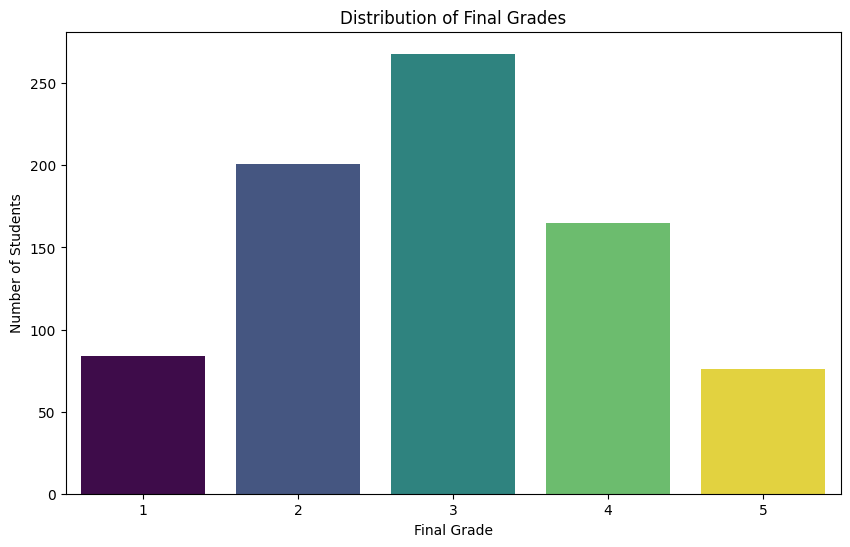

In [264]:
# Showing a Graph of Distribution of final Grades

# Plot distribution of final grades
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='final_grade', hue='final_grade', palette="viridis", legend=False)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

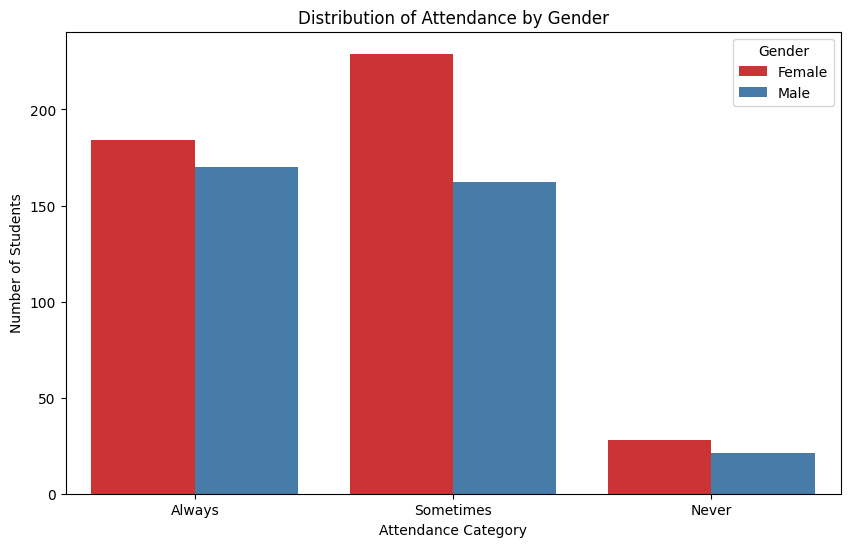

In [265]:
# Create a count plot for attendance by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='attendance', hue='sex', palette='Set1')

# Customize the plot
plt.title('Distribution of Attendance by Gender')
plt.xlabel('Attendance Category')
plt.ylabel('Number of Students')
plt.xticks(ticks=[0, 1, 2], labels=['Always', 'Sometimes', 'Never'], rotation=0)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

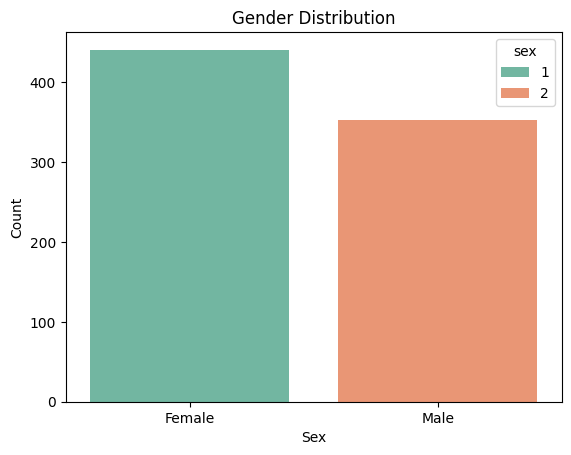

In [266]:
# Chart for distribution of gender
sns.countplot(x='sex', data=merged_df, hue='sex', palette='Set2')

# Labels, 1 for Female and 2 for Male
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

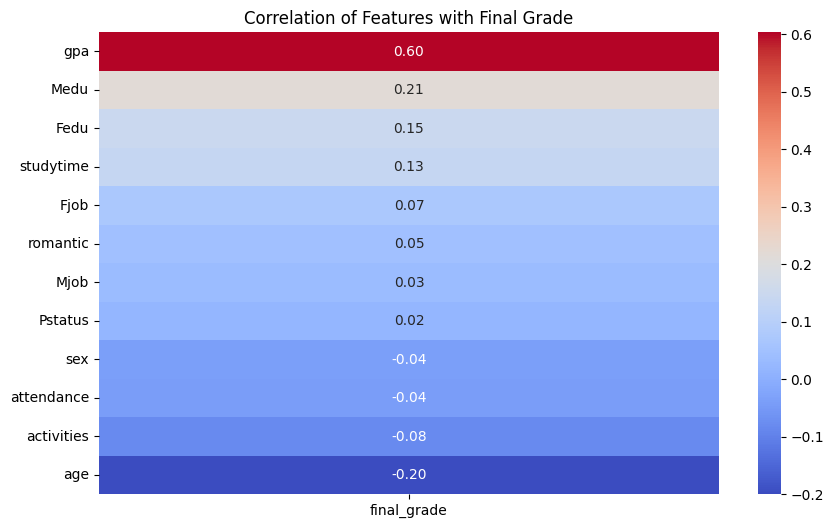

In [267]:
# Heatmap to show correlation of features with final grade

# Calculate a correlation matrix
corr = merged_df.corr()

# The correlation of features with final grade
final_grade_corr = corr['final_grade'].sort_values(ascending=False)

# Drop the final_grade, because it is self correlating
final_grade_corr = final_grade_corr.drop('final_grade')

# Plotting the heat map
plt.figure(figsize=(10,6))
sns.heatmap(final_grade_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation of Features with Final Grade')
plt.show

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_26191/3623346030.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=merged_df, palette='Set3')


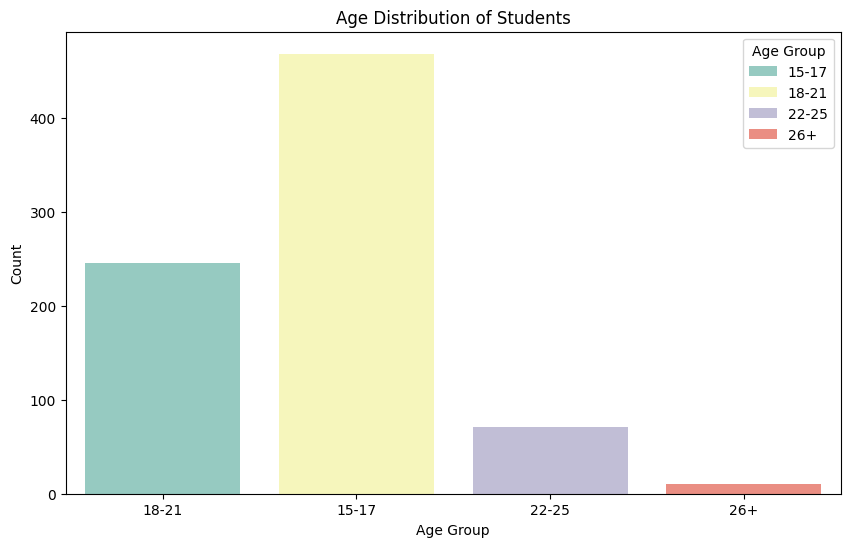

In [268]:
# Creating graph to show age distrabution of students
# Create a dictionary to map the binned values to the age groups
age_bin_labels = {0: '15-17', 1: '18-21', 2: '22-25', 3: '26+'}

# Add column based on age group
merged_df['age_group'] = merged_df['age'].map(age_bin_labels)

# plot the graph
plt.figure(figsize=(10,6))
sns.countplot(x='age_group', data=merged_df, palette='Set3')

# Add lables and title
plt.title('Age Distribution of Students')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Legend to show the age groups
plt.legend(title='Age Group', labels=['15-17', '18-21', '22-25', '26+'])

plt.show()

# Removing age group column
merged_df = merged_df.drop(columns=['age_group'])

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_26191/3696986826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='studytime', y='final_grade', data=df1, palette='Set2')


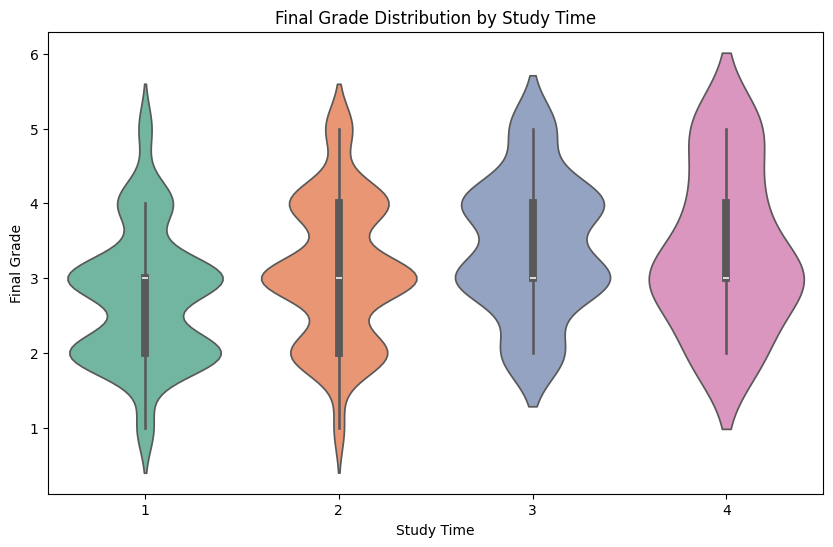

In [269]:
plt.figure(figsize=(10,6))
sns.violinplot(x='studytime', y='final_grade', data=df1, palette='Set2')
plt.title('Final Grade Distribution by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

In [270]:
# Implementing Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Features 
X_merged = merged_df.drop(columns=['final_grade'])
# Target Variable
y_merged = merged_df['final_grade']

# Apply one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop="first"' prevents multicollinearity
X_encoded = pd.DataFrame(encoder.fit_transform(X_merged), columns=encoder.get_feature_names_out(X_merged.columns))

# Split data into training and testing sets
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_merged, y_merged, test_size=0.3, random_state=1)

# Initializing the Decison Tree 
clf_merged = DecisionTreeClassifier(random_state=42, max_depth=3)

# Training model
clf_merged.fit(X_train_merged, y_train_merged)

# Make predictions
y_pred_merged = clf_merged.predict(X_test_merged)

# Training accuracy
y_train_pred = clf_merged.predict(X_train_merged)
train_accuracy = accuracy_score(y_train_merged, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Test accuracy
y_test_pred = clf_merged.predict(X_test_merged)
test_accuracy = accuracy_score(y_test_merged, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.65
Test Accuracy: 0.62


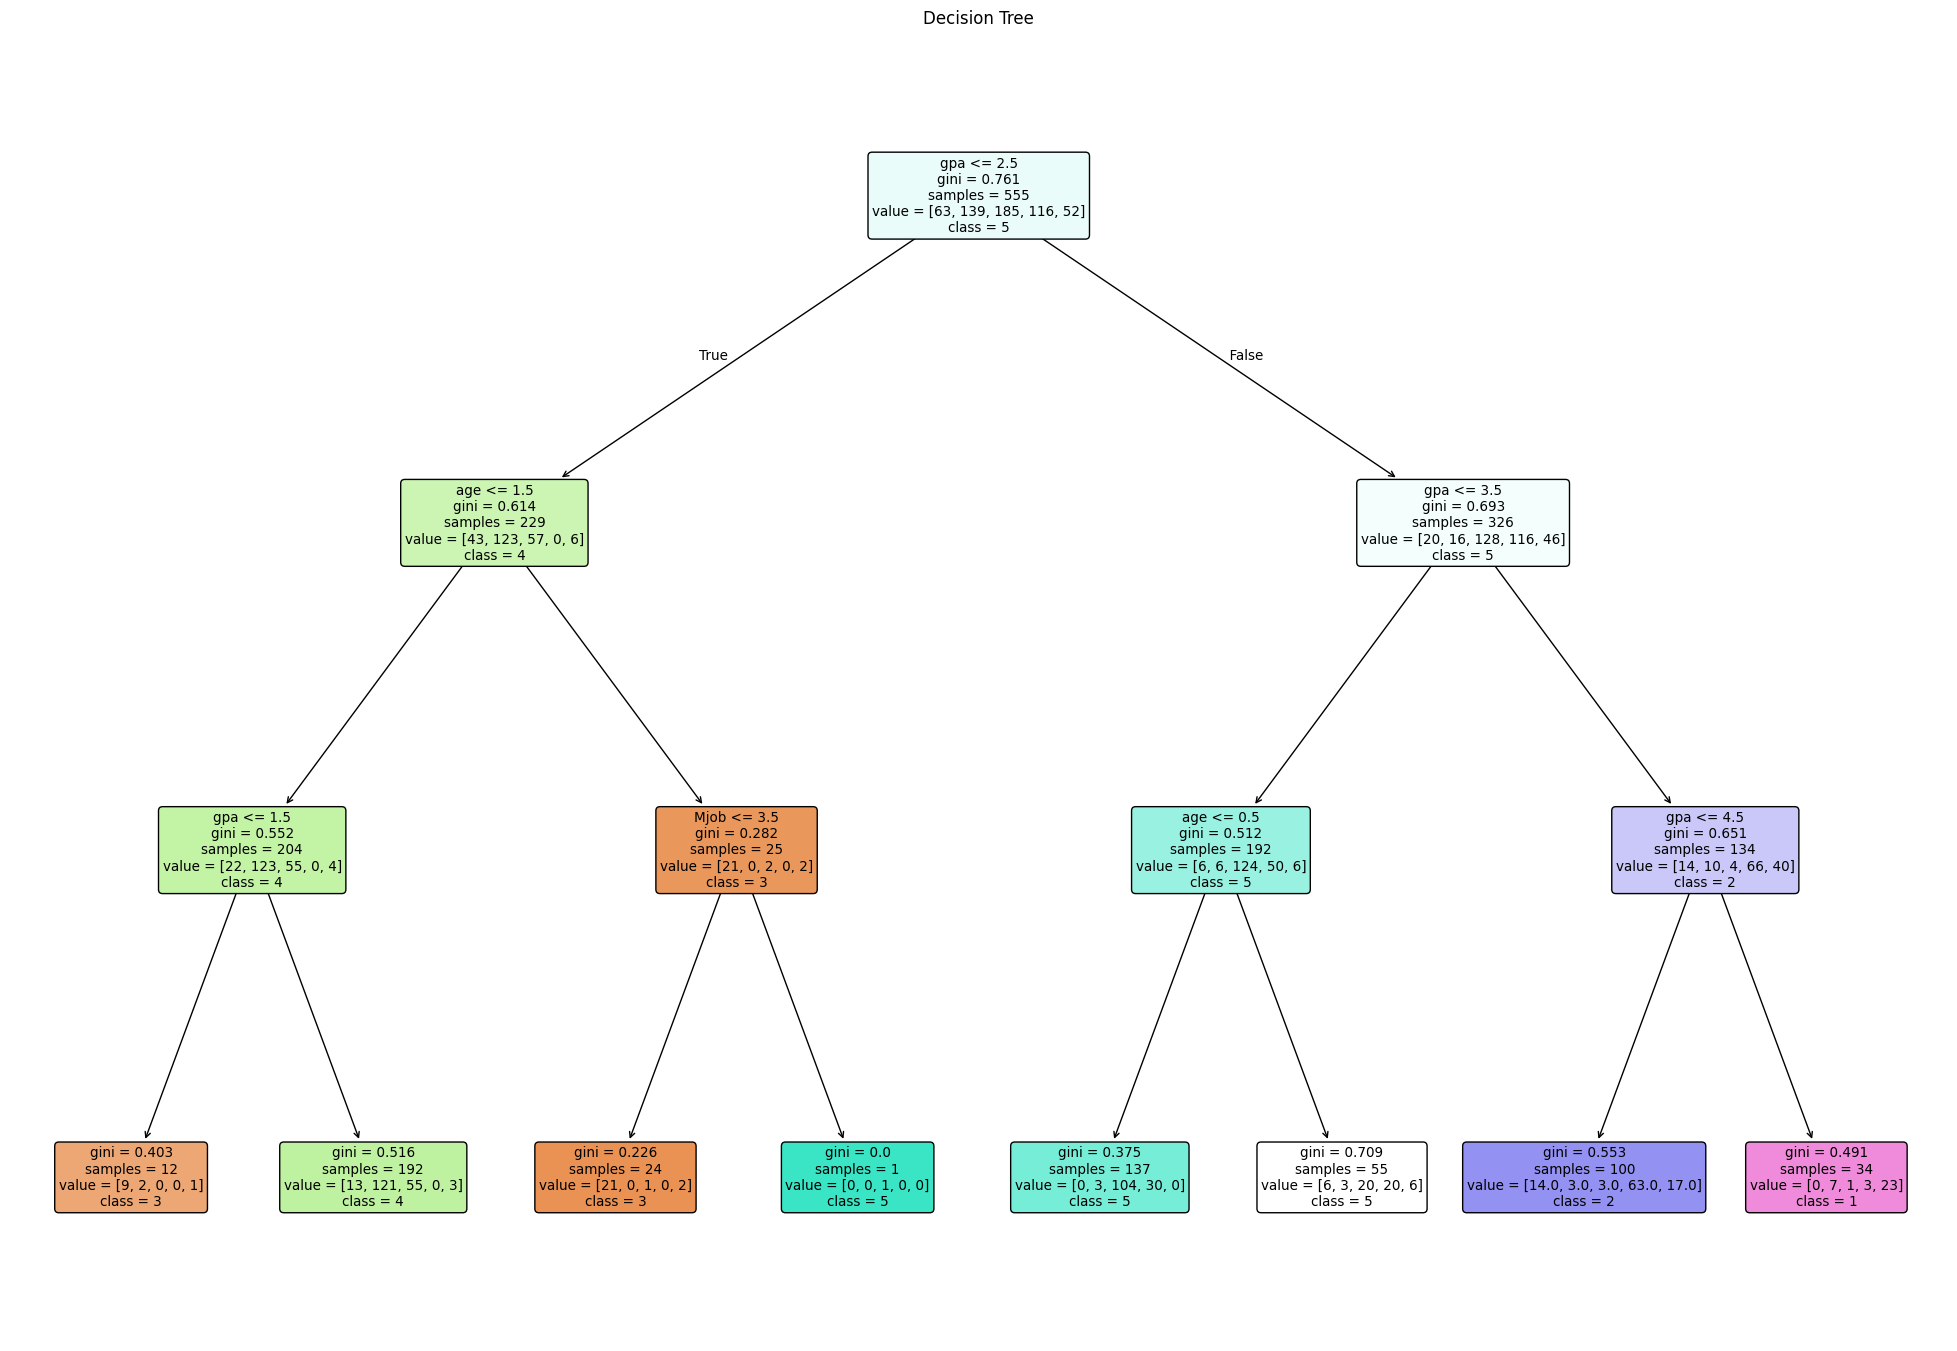


Decision Tree Rules:
|--- gpa <= 2.50
|   |--- age <= 1.50
|   |   |--- gpa <= 1.50
|   |   |   |--- class: 1
|   |   |--- gpa >  1.50
|   |   |   |--- class: 2
|   |--- age >  1.50
|   |   |--- Mjob <= 3.50
|   |   |   |--- class: 1
|   |   |--- Mjob >  3.50
|   |   |   |--- class: 3
|--- gpa >  2.50
|   |--- gpa <= 3.50
|   |   |--- age <= 0.50
|   |   |   |--- class: 3
|   |   |--- age >  0.50
|   |   |   |--- class: 3
|   |--- gpa >  3.50
|   |   |--- gpa <= 4.50
|   |   |   |--- class: 4
|   |   |--- gpa >  4.50
|   |   |   |--- class: 5



In [271]:
from sklearn.tree import plot_tree

#Visualize the decision rules
plt.figure(figsize=(25, 17))
# Convert class names to strings
class_names = [str(cls) for cls in y_merged.unique()]
plot_tree(clf_merged, feature_names=X_merged.columns, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

tree_rules = export_text(clf_merged, feature_names=list(X_merged.columns))
print("\nDecision Tree Rules:")
print(tree_rules)

,precision,recall,f1-score,support
1,0.636364,0.333333,0.437500,21.000000
2,0.600000,0.870968,0.710526,62.000000
3,0.675325,0.626506,0.650000,83.000000
4,0.595745,0.571429,0.583333,49.000000
5,0.428571,0.250000,0.315789,24.000000
accuracy,0.615063,0.615063,0.615063,0.615063
macro avg,0.587201,0.530447,0.539430,239.000000
weighted avg,0.611267,0.615063,0.599801,239.000000


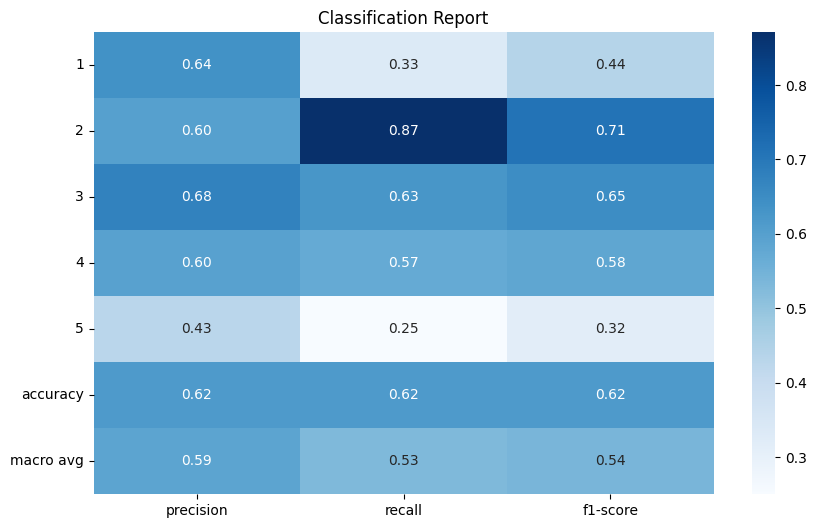

In [272]:
# Getting Classification report and Visuals
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test_merged, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.show()

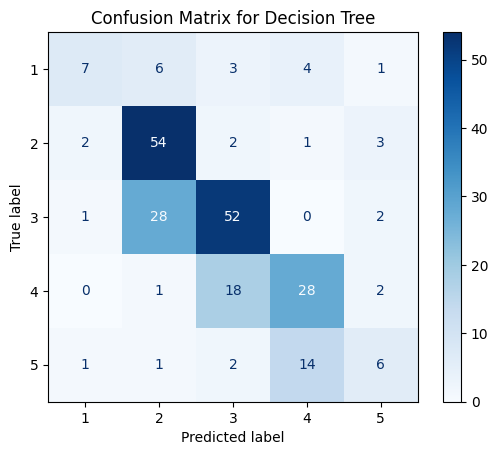

In [273]:
# Making a Confusion Matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test_merged, y_pred_merged)

# Show the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_merged.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


In [274]:
# Using Gradient Boost to show results with more complex model for comparison
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosing Model 
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=2)
gb_model.fit(X_train_merged, y_train_merged)

# Evaluating the model
train_accuracy = gb_model.score(X_train_merged, y_train_merged)
test_accuracy = gb_model.score(X_test_merged, y_test_merged)
print(f"Gradient Boosting Training Accuracy: {train_accuracy:.2f}")
print(f"Gradient Boosting Test Accuracy: {test_accuracy:.2f}")

Gradient Boosting Training Accuracy: 0.86
Gradient Boosting Test Accuracy: 0.61


In [275]:
# Checking class distribution
class_distribution = y_merged.value_counts(normalize=True) * 100

# Display the class distribution
print(class_distribution)

final_grade
3    33.753149
2    25.314861
4    20.780856
1    10.579345
5     9.571788
Name: proportion, dtype: float64


In [276]:
# Using class weights as balanced to compare results

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_merged, y_merged, test_size=0.3, random_state=1)
# Initializing the Decision Tree 
clf_balanced = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# Train the model with balanced class weights
clf_balanced.fit(X_train_merged, y_train_merged)

# Make predictions and evaluate accuracy
y_pred_balanced = clf_balanced.predict(X_test_merged)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
print(f"Accuracy with class weight: {accuracy_balanced:.2f}")

Accuracy with class weight: 0.52


In [277]:
# Removing possibly irrelevent Features to reduce noise in data
# Remove 'sex' and 'romantic' columns from the DataFrame
df_cleaned = merged_df.drop(columns=['sex', 'romantic'])

# Display the cleaned DataFrame
display(df_cleaned)

,age,Medu,Fedu,Mjob,Fjob,studytime,activities,attendance,Pstatus,gpa,final_grade
0,1,4,4,2,3,2,2,2,2,1,3
1,0,1,1,2,6,2,2,2,1,2,3
2,0,1,1,2,6,2,2,2,1,3,3
3,0,4,2,2,3,3,1,1,1,4,4
4,0,3,3,6,6,2,2,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
789,2,1,2,2,4,3,1,1,2,3,4
790,1,1,1,2,1,3,2,2,1,5,4
791,1,3,4,2,4,2,2,1,1,4,1
792,2,4,4,3,3,2,1,1,1,5,3


In [278]:
# Train Decision Tree on new data with irrelevent features removed
from sklearn.model_selection import cross_val_score

# Features 
X_cleaned = df_cleaned.drop(columns=['final_grade'])
# Target Variable
y_cleaned = df_cleaned['final_grade']

# Split data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

# Initializing the Decison Tree 
clf_clean = DecisionTreeClassifier(random_state=42, max_depth=3)

# Training model
clf_clean.fit(X_train_clean, y_train_clean)

# Make predictions
y_pred_clean = clf_clean.predict(X_test_clean)

# Training accuracy
y_train_pred_clean = clf_clean.predict(X_train_clean)
train_accuracy_clean = accuracy_score(y_train_clean, y_train_pred_clean)
print(f"Training Accuracy with cleaned Features: {train_accuracy_clean:.2f}")

# Test accuracy
y_test_pred_clean = clf_clean.predict(X_test_clean)
test_accuracy_clean = accuracy_score(y_test_clean, y_test_pred_clean)
print(f"Testing Accuracy with cleaned Features: {test_accuracy_clean:.2f}")

# Checking cross validation to see if model accuracy is consistent across subsets of data
cv_scores = cross_val_score(clf_clean, X_cleaned, y_cleaned, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")

Training Accuracy with cleaned Features: 0.64
Testing Accuracy with cleaned Features: 0.64
Cross-validation scores: [0.7672956  0.6918239  0.69811321 0.58490566 0.4556962 ]
Mean cross-validation accuracy: 0.64


In [279]:
# Applying Decision Tree on Original dataset
# Drop 3 Target values from original dataset
df1 = df1.drop(columns=['G1', 'G2', 'G3'])
# Checking to make sure dataset doesn't have 3 target columns
display(df1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,attendance,average_grade,gpa,final_grade
0,GP,1,1,U,GT3,2,4,4,2,3,...,3,4,1,1,3,4,2,5.5,1,3
1,GP,1,0,U,GT3,1,1,1,2,6,...,3,3,1,1,3,2,2,10.0,2,3
2,GP,1,0,U,LE3,1,1,1,2,6,...,3,2,2,3,3,6,2,12.5,3,3
3,GP,1,0,U,GT3,1,4,2,2,3,...,2,2,1,1,5,0,1,14.0,4,4
4,GP,1,0,U,GT3,1,3,3,6,6,...,3,2,1,2,5,0,1,12.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,1,1,R,GT3,1,2,3,3,6,...,4,2,1,2,5,4,2,10.5,2,2
645,MS,1,1,U,LE3,1,3,1,3,3,...,3,4,1,1,1,4,2,15.0,4,4
646,MS,1,1,U,GT3,1,1,1,6,6,...,1,1,1,1,5,6,2,11.5,3,2
647,MS,2,0,U,LE3,1,3,1,3,3,...,4,5,3,4,2,6,2,10.0,2,2


Accuracy: 0.78


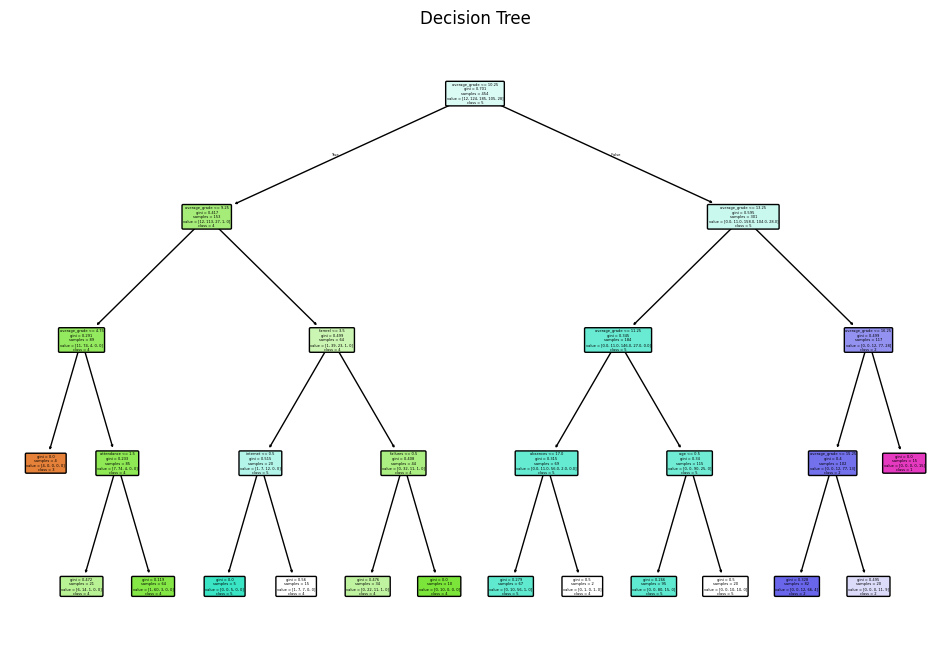

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

#Encoding categorical values
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher', 'internet', 'romantic']
encoder = LabelEncoder()

# Fitting columns in the dataset
for col in categorical_columns:
    df1[col] = encoder.fit_transform(df1[col])

# Features
X_df1 = df1.drop('final_grade', axis=1)
# Target
y_df1 = df1['final_grade']

# Train - Test split
X_df1_train, X_df1_test, y_df1_train, y_df1_test = train_test_split(X_df1, y_df1, test_size=0.3, random_state=1)

# Training Decision Tree
df1_model = DecisionTreeClassifier(random_state=1, max_depth=4)
df1_model.fit(X_df1_train, y_df1_train)

# Evaluate
y_df1_pred = df1_model.predict(X_df1_test)
df1_accuaracy = accuracy_score(y_df1_test, y_df1_pred)
print(f'Accuracy with original data: {df1_accuaracy:.2f}')

# Show the Decision Tree
plt.figure(figsize=(12, 8))
# Convert class names to strings to show on tree
class_names = [str(cls) for cls in y_df1.unique()]
plot_tree(df1_model, feature_names=X_df1.columns, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()